## TP7 - Remuestreo, Recontrucción y Cuatinzación

In [82]:
from PIL import Image
from PIL import ImageDraw
import numpy as np
from matplotlib import pyplot as plt

In [83]:
def im_to_YIQ(im):
    im_norm= im/256
    mat_a_YIQ= np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    im_yiq= np.dot(im_norm, mat_a_YIQ.T)
    return im_yiq

(256, 256)

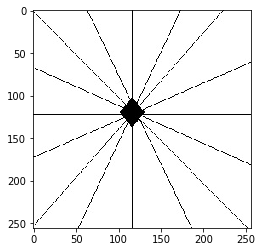

In [84]:
im1= Image.open("diagonal.jpg")
ima= np.asarray(im1)
im_yiq= im_to_YIQ(ima)
Y= im_yiq[:,:,0]
plt.imshow(Y, cmap="gray")
plt.imsave("original.bmp",Y, cmap="gray")
an= Y.shape[0]
al= Y.shape[1]
an, al

## Downsampling X2

(129, 129)

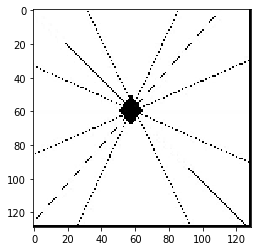

In [85]:
#Submuestreo
out= np.zeros((int(an/2)+1,int(al/2)+1))
              
for x in range(0,an,1):
    for y in range(0,al,1):
        aux= Y[x:x+2, y:y+2]
        out[int(x/2),int(y/2)]=aux[0,0]
plt.imshow(out, cmap="gray")
an_out= out.shape[0]
al_out= out.shape[1]
an_out, al_out

(129, 129)

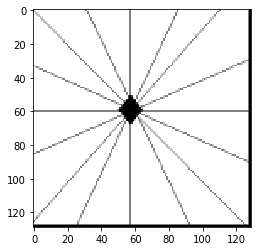

In [86]:
#Bilineal
out= np.zeros((int(an/2)+1,int(al/2)+1))
              
for x in range(0,an,1):
    for y in range(0,al,1):
        aux= Y[x:x+2, y:y+2]
        out[int(x/2),int(y/2)]=aux.sum()/4
plt.imshow(out, cmap="gray")
an_out= out.shape[0]
al_out= out.shape[1]
an_out, al_out

(129, 129)

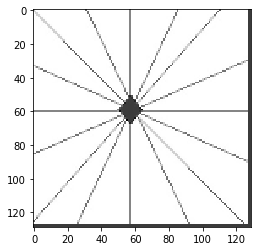

In [87]:
#Bicubico
kernel= np.array((-1/8, 5/8, 5/8, -1/8))
kernel2= np.dot(kernel.reshape((4,1)),kernel.reshape((1,4)))

out= np.zeros((int(an/2)+1,int(al/2)+1))
 

for x in range(0,an-1,1):
    for y in range(0,al-1,1):
        aux= Y[x-1:x+3, y-1:y+3]
        if(aux.shape[0]>3):
            if(aux.shape[1]>3):
                aux_x=aux*kernel2
                aux_y=np.zeros((2,2))
                valor=aux_x.sum()
                if valor>1:
                    valor=1
                out[int(x/2),int(y/2)]=valor
        
aux_x
plt.imshow(out, cmap="gray")
an_out= out.shape[0]
al_out= out.shape[1]
an_out, al_out

## Upsampling X2

(341, 512)

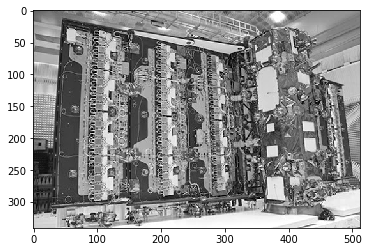

In [88]:
im1= Image.open("saocom.jpg")
ima= np.asarray(im1)
im_yiq= im_to_YIQ(ima)
Y= im_yiq[:,:,0]
plt.imshow(Y, cmap="gray")
plt.imsave("original.bmp",Y, cmap="gray")
an= Y.shape[0]
al= Y.shape[1]
an, al

(682, 1024)

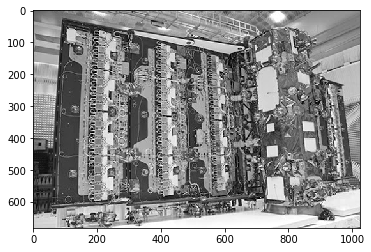

In [89]:
#Supermuestreo
out= np.zeros((int(an*2),int(al*2)))
              
for x in range(0,an,1):
    for y in range(0,al,1):
        aux= Y[x, y]
        out[2*x:2*x+2,2*y:2*y+2]=aux
plt.imshow(out, cmap="gray")
an_out= out.shape[0]
al_out= out.shape[1]
an_out, al_out

(681, 1023)

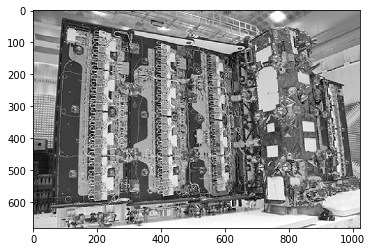

In [90]:
#Bilineal
out= np.zeros((int(an*2)-1,int(al*2)-1))
              
for x in range(0,an-1,1):
    for y in range(0,al-1,1):
        
        aux= Y[x:x+2, y:y+2]
        out[2*x,2*y]= aux[0,0]
        out[2*x+1,2*y]= (aux[0,0]+aux[1,0])/2
        out[2*x,2*y+1]= (aux[0,0]+aux[0,1])/2
        out[2*x+1,2*y+1]= (aux[0,0]+aux[1,0]+ aux[0,0]+aux[0,1])/4


plt.imshow(out, cmap="gray")
plt.imsave("out.jpg",out, cmap="gray")
an_out= out.shape[0]
al_out= out.shape[1]
an_out, al_out

(681, 1023)

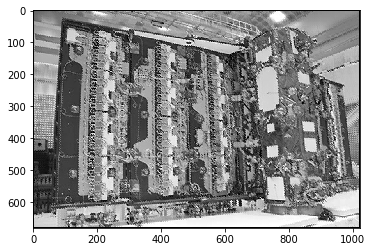

In [91]:
#Bicúbica
kernel= np.array((-1/8, 5/8, 5/8, -1/8))
kernel2= np.dot(kernel.reshape((4,1)),kernel.reshape((1,4)))

out= np.zeros((int(an*2)-1,int(al*2)-1))
        
for x in range(0,an-1,1):
    for y in range(0,al-1,1):
        
        aux= Y[x-1:x+3, y-1:y+3]
        if(aux.shape[0]==4):
            if(aux.shape[1]==4):
                out[2*x,2*y]= aux[0,0]
                out[2*x,(2*y)+1]= np.sum(aux[1,:]*kernel)
                out[(2*x)+1,(2*y)]= np.sum(aux[:,1]*kernel)
                out[(2*x)+1,(2*y)+1]= np.sum(aux*kernel2)
out[out>1]=1
out[out<0]=0
plt.imshow(out, cmap="gray")
plt.imsave("out.bmp",out, cmap="gray")
an_out= out.shape[0]
al_out= out.shape[1]
an_out, al_out


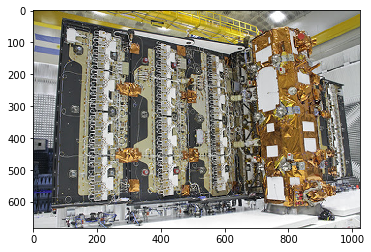

In [92]:
im_lanczos=im1.resize((al*2,an*2),Image.LANCZOS)
plt.imshow(im_lanczos)

## Cuantización

(256, 489)

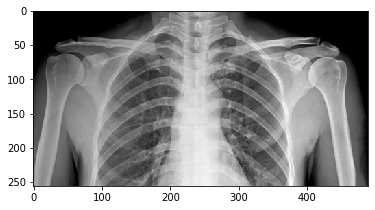

In [93]:
im= Image.open("radio.jpg")
ima= np.asarray(im)
im_yiq= im_to_YIQ(ima)
Y= im_yiq[:,:,0]
plt.imshow(Y, cmap="gray")
an= Y.shape[0]
al= Y.shape[1]
an, al

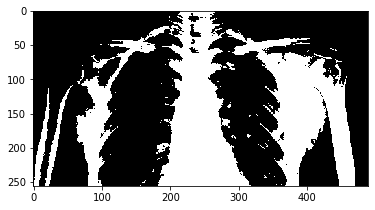

In [94]:
#Cuatización uniforme
niv= 2
aux= np.zeros((an,al))
for x in range(0,an):
    for y in range(0,al):
        for i in range(0,niv):
            if Y[x,y]>i/niv and Y[x,y]<i+1/niv:
                aux[x,y]= i/niv
                
plt.imshow(aux, cmap="gray")

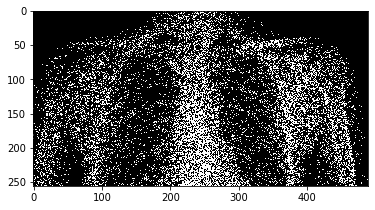

In [95]:
#Dithering Aleatorio
niv= 2
aux= np.zeros((an,al))

for x in range(0,an):
    for y in range(0,al):
        rand= np.random.rand(niv,1)
        ran= np.sort(rand.reshape(niv,))
        ran[0]=0

        for i in range(0,niv-1):

            if Y[x,y]>=ran[i] and Y[x,y]<ran[i+1]:
                aux[x,y]= ran[i]
            if Y[x,y]>=ran[niv-1]:
                aux[x,y]= 1
            
plt.imshow(aux, cmap="gray")

62238

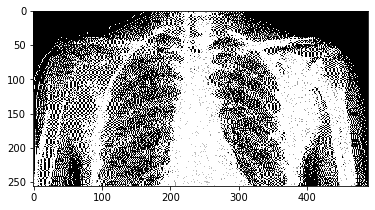

In [96]:
#Difusión del error
niv=8
aux= np.zeros((an,al))
niveles= np.arange(0,1+1/niv,step=1/niv)

for x in range(0,an):
    error=0
    for y in range(0,al):
        
        for i in range(0,niv-1):
            if Y[x,y]>=niveles[i]+error and Y[x,y]<niveles[i+1]+error:
                aux[x,y]=niveles[i]
            if Y[x,y]>=niveles[i+1]+error:
                aux[x,y]=1
            error= error+aux[x,y]-Y[x,y]   
plt.imshow(aux, cmap="gray")
aux[aux==1].size

## Funciones y kernel's

In [97]:
kernel= np.array((-1/8, 5/8, 5/8, -1/8))
kernel2= np.dot(kernel.reshape((4,1)),kernel.reshape((1,4)))

def submuestreo(im1):
    ima= np.asarray(im1)
    im_yiq= im_to_YIQ(ima)
    Y= im_yiq[:,:,0]
    an= Y.shape[0]
    al= Y.shape[1]
    out= np.zeros((int(an/2)+1,int(al/2)+1))
              
    for x in range(0,an,1):
        for y in range(0,al,1):
            aux= Y[x:x+2, y:y+2]
            out[int(x/2),int(y/2)]=aux[0,0]
    return out

def subm_bilineal(im1):
    ima= np.asarray(im1)
    im_yiq= im_to_YIQ(ima)
    Y= im_yiq[:,:,0]
    an= Y.shape[0]
    al= Y.shape[1]
    out= np.zeros((int(an/2)+1,int(al/2)+1))
    for x in range(0,an,1):
        for y in range(0,al,1):
            aux= Y[x:x+2, y:y+2]
            out[int(x/2),int(y/2)]=aux.sum()/4
    return out

def subm_bicubico(im1):
    ima= np.asarray(im1)
    im_yiq= im_to_YIQ(ima)
    Y= im_yiq[:,:,0]
    an= Y.shape[0]
    al= Y.shape[1]
    out= np.zeros((int(an/2)+1,int(al/2)+1))
    for x in range(0,an-1,1):
        for y in range(0,al-1,1):
            aux= Y[x-1:x+3, y-1:y+3]
            if(aux.shape[0]>3):
                if(aux.shape[1]>3):
                    aux_x=aux*kernel2
                    valor=aux_x.sum()
                    if valor>1:
                        valor=1
                    out[int(x/2),int(y/2)]=valor
    return out

def supermuestreo(im1):
    ima= np.asarray(im1)
    im_yiq= im_to_YIQ(ima)
    Y= im_yiq[:,:,0]
    an= Y.shape[0]
    al= Y.shape[1]
    out= np.zeros((int(an*2),int(al*2)))

    for x in range(0,an,1):
        for y in range(0,al,1):
            aux= Y[x, y]
            out[2*x:2*x+2,2*y:2*y+2]=aux
    return out

def superm_bilineal(im1):
    ima= np.asarray(im1)
    im_yiq= im_to_YIQ(ima)
    Y= im_yiq[:,:,0]
    an= Y.shape[0]
    al= Y.shape[1]
    out= np.zeros((int(an*2)-1,int(al*2)-1))
    for x in range(0,an-1,1):
        for y in range(0,al-1,1):

            aux= Y[x:x+2, y:y+2]
            out[2*x,2*y]= aux[0,0]
            out[2*x+1,2*y]= (aux[0,0]+aux[1,0])/2
            out[2*x,2*y+1]= (aux[0,0]+aux[0,1])/2
            out[2*x+1,2*y+1]= (aux[0,0]+aux[1,0]+ aux[0,0]+aux[0,1])/4
    return out

def superm_bicubico(im1):
    ima= np.asarray(im1)
    im_yiq= im_to_YIQ(ima)
    Y= im_yiq[:,:,0]
    an= Y.shape[0]
    al= Y.shape[1]
    out= np.zeros((int(an*2)-1,int(al*2)-1))
    for x in range(0,an-1,1):
        for y in range(0,al-1,1):

            aux= Y[x-1:x+3, y-1:y+3]
            if(aux.shape[0]==4):
                if(aux.shape[1]==4):
                    out[2*x,2*y]= aux[1,1]
                    out[2*x,2*y+1]= np.sum(aux[1,:]*kernel)
                    out[2*x+1,2*y]= np.sum(aux[:,1]*kernel)
                    out[2*x+1,2*y+1]= np.sum(aux*kernel2)
    out[out>1]=1
    out[out<0]=0
    return out


def cuan_uniforme(im1,niv):
    ima= np.asarray(im1)
    im_yiq= im_to_YIQ(ima)
    Y= im_yiq[:,:,0]
    an= Y.shape[0]
    al= Y.shape[1]
    aux= np.zeros((an,al))
    for x in range(0,an):
        for y in range(0,al):
            for i in range(0,niv):
                if Y[x,y]>i/niv and Y[x,y]<i+1/niv:
                    aux[x,y]= i/niv
    return aux

def dit_aleatorio(im1,niv):
    ima= np.asarray(im1)
    im_yiq= im_to_YIQ(ima)
    Y= im_yiq[:,:,0]
    an= Y.shape[0]
    al= Y.shape[1]
    aux= np.zeros((an,al))
    for x in range(0,an):
        for y in range(0,al):
            rand= np.random.rand(niv,1)
            ran= np.sort(rand.reshape(niv,))
            ran[0]=0

            for i in range(0,niv-1):

                if Y[x,y]>=ran[i] and Y[x,y]<ran[i+1]:
                    aux[x,y]= ran[i]
                if Y[x,y]>=ran[niv-1]:
                    aux[x,y]= 1
    return aux

def dif_error(im1,niv):
    ima= np.asarray(im1)
    im_yiq= im_to_YIQ(ima)
    Y= im_yiq[:,:,0]
    an= Y.shape[0]
    al= Y.shape[1]
    aux= np.zeros((an,al))
    niveles= np.arange(0,1+1/niv,step=1/niv)
    for x in range(0,an):
        error=0
        for y in range(0,al):

            for i in range(0,niv-1):
                if Y[x,y]>=niveles[i]+error and Y[x,y]<niveles[i+1]+error:
                    aux[x,y]=niveles[i]
                if Y[x,y]>=niveles[i+1]+error:
                    aux[x,y]=1
                error= error+aux[x,y]-Y[x,y]   
    return aux

# FIN